# Task 3 - Text Mining and Sentimental Analysis

https://www.kaggle.com/datasets/harishedison/flipkart-reviews-sentiment-analysis

In [1]:
# install wordcloud
!pip install WordCloud
!pip install pandas nltk scikit-learn textblob

In [3]:
# import necessary Libraries for text mining

# Importing libraries

import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Filpkart Laptop reviews
df =pd.read_csv("flipkart.csv")

In [6]:
df.head()

,Unnamed: 0,Product_name,review,Rating
0,0,DELL Inspiron Athlon Dual Core 3050U,Best under 60k Great performanceI got it for a...,5
1,1,DELL Inspiron Athlon Dual Core 3050U,Good perfomence...,5
2,2,DELL Inspiron Athlon Dual Core 3050U,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U,"Light weight laptop with new amazing features,...",5


In [7]:
df.tail()

,Unnamed: 0,Product_name,review,Rating
2146,2146,HP Ryzen 3 Dual Core 3250U,Superb Monitor ...Loved it ❤️,5
2147,2147,HP Ryzen 3 Dual Core 3250U,nice product and beautiful monitor 😍😍 very cl...,5
2148,2148,HP Ryzen 3 Dual Core 3250U,LG monitor is very good it is budget segment m...,5
2149,2149,HP Ryzen 3 Dual Core 3250U,well.....Ist of all package was mind blowing s...,5
2150,2150,HP Ryzen 3 Dual Core 3250U,I like thz product. Low cost and wide screen. ...,4


In [8]:
# Count the values of the "Product_name" column

product_name_counts = df['Product_name'].value_counts()

# Print the counts
print(product_name_counts)

HP Core i3 11th Gen                                 811
ASUS VivoBook 15 (2021) Core i3 10th Gen            546
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H     463
HP Ryzen 3 Dual Core 3250U                          126
ASUS Ryzen 3 Dual Core 3250U 3rd Gen                113
DELL Inspiron Athlon Dual Core 3050U                 92
Name: Product_name, dtype: int64


In [9]:
# sum the values of the "Product_name" column

product_name_counts = df['Product_name'].value_counts().sum()

# Print the counts
print(product_name_counts)

2151


In [10]:
df.info


<bound method DataFrame.info of       Unnamed: 0                          Product_name  \
0              0  DELL Inspiron Athlon Dual Core 3050U   
1              1  DELL Inspiron Athlon Dual Core 3050U   
2              2  DELL Inspiron Athlon Dual Core 3050U   
3              3  DELL Inspiron Athlon Dual Core 3050U   
4              4  DELL Inspiron Athlon Dual Core 3050U   
...          ...                                   ...   
2146        2146            HP Ryzen 3 Dual Core 3250U   
2147        2147            HP Ryzen 3 Dual Core 3250U   
2148        2148            HP Ryzen 3 Dual Core 3250U   
2149        2149            HP Ryzen 3 Dual Core 3250U   
2150        2150            HP Ryzen 3 Dual Core 3250U   

                                                 review  Rating  
0     Best under 60k Great performanceI got it for a...       5  
1                                    Good perfomence...       5  
2     Great performance but usually it has also that...       5  
3      

In [11]:
df.describe(include = 'all')

,Unnamed: 0,Product_name,review,Rating
count,2151.000000,2151,2151,2151.000000
unique,NaN,6,1242,NaN
top,NaN,HP Core i3 11th Gen,Good,NaN
freq,NaN,811,46,NaN
mean,1075.000000,NaN,NaN,4.238029
std,621.084535,NaN,NaN,1.196532
min,0.000000,NaN,NaN,1.000000
25%,537.500000,NaN,NaN,4.000000
50%,1075.000000,NaN,NaN,5.000000
75%,1612.500000,NaN,NaN,5.000000


# Data Preprocessing Text Mining

In [12]:
# Tokenize the review
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
                                          
df['tokenized_review'] = df['review'].apply(lambda x: tokenizer.tokenize(x))
                                          
print(df.tokenized_review)

0       [Best, under, 60k, Great, performanceI, got, i...
1                                      [Good, perfomence]
2       [Great, performance, but, usually, it, has, al...
3           [My, wife, is, so, happy, and, best, product]
4       [Light, weight, laptop, with, new, amazing, fe...
                              ...                        
2146                         [Superb, Monitor, Loved, it]
2147    [nice, product, and, beautiful, monitor, very,...
2148    [LG, monitor, is, very, good, it, is, budget, ...
2149    [well, Ist, of, all, package, was, mind, blowi...
2150    [I, like, thz, product, Low, cost, and, wide, ...
Name: tokenized_review, Length: 2151, dtype: object


In [13]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# remove stop words

df['cleaned_review'] =df['tokenized_review'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

In [15]:
df.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review
0,0,DELL Inspiron Athlon Dual Core 3050U,Best under 60k Great performanceI got it for a...,5,"[Best, under, 60k, Great, performanceI, got, i...","[best, 60k, great, performancei, got, around, ..."
1,1,DELL Inspiron Athlon Dual Core 3050U,Good perfomence...,5,"[Good, perfomence]","[good, perfomence]"
2,2,DELL Inspiron Athlon Dual Core 3050U,Great performance but usually it has also that...,5,"[Great, performance, but, usually, it, has, al...","[great, performance, usually, also, gaming, la..."
3,3,DELL Inspiron Athlon Dual Core 3050U,My wife is so happy and best product 👌🏻😘,5,"[My, wife, is, so, happy, and, best, product]","[wife, happy, best, product]"
4,4,DELL Inspiron Athlon Dual Core 3050U,"Light weight laptop with new amazing features,...",5,"[Light, weight, laptop, with, new, amazing, fe...","[light, weight, laptop, new, amazing, features..."


In [16]:
# Lemmatization 

lemmatizer = nltk.stem.WordNetLemmatizer()

df['lemmatized_review'] = df['cleaned_review'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [17]:
print('lemmatized_review:', df.cleaned_review)

lemmatized_review: 0       [best, 60k, great, performancei, got, around, ...
1                                      [good, perfomence]
2       [great, performance, usually, also, gaming, la...
3                            [wife, happy, best, product]
4       [light, weight, laptop, new, amazing, features...
                              ...                        
2146                             [superb, monitor, loved]
2147    [nice, product, beautiful, monitor, clear, scr...
2148    [lg, monitor, good, budget, segment, monitor, ...
2149    [well, ist, package, mind, blowing, safe, tigh...
2150    [like, thz, product, low, cost, wide, screen, ...
Name: cleaned_review, Length: 2151, dtype: object


In [18]:
df.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review
0,0,DELL Inspiron Athlon Dual Core 3050U,Best under 60k Great performanceI got it for a...,5,"[Best, under, 60k, Great, performanceI, got, i...","[best, 60k, great, performancei, got, around, ...","[best, 60k, great, performancei, got, around, ..."
1,1,DELL Inspiron Athlon Dual Core 3050U,Good perfomence...,5,"[Good, perfomence]","[good, perfomence]","[good, perfomence]"
2,2,DELL Inspiron Athlon Dual Core 3050U,Great performance but usually it has also that...,5,"[Great, performance, but, usually, it, has, al...","[great, performance, usually, also, gaming, la...","[great, performance, usually, also, gaming, la..."
3,3,DELL Inspiron Athlon Dual Core 3050U,My wife is so happy and best product 👌🏻😘,5,"[My, wife, is, so, happy, and, best, product]","[wife, happy, best, product]","[wife, happy, best, product]"
4,4,DELL Inspiron Athlon Dual Core 3050U,"Light weight laptop with new amazing features,...",5,"[Light, weight, laptop, with, new, amazing, fe...","[light, weight, laptop, new, amazing, features...","[light, weight, laptop, new, amazing, feature,..."


# sentimental analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
sentiment = SentimentIntensityAnalyzer()

In [20]:
# Assuming df['lemmatized_reviews'] contains lists of lemmatized words
# Convert each list to a string

df['lemmatized_review'] = df['lemmatized_review'].apply(' '.join)

# Initialize the SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the lemmatized reviews

df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['lemmatized_review']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['lemmatized_review']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['lemmatized_review']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['lemmatized_review']]

In [21]:
df.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos
0,0,DELL Inspiron Athlon Dual Core 3050U,Best under 60k Great performanceI got it for a...,5,"[Best, under, 60k, Great, performanceI, got, i...","[best, 60k, great, performancei, got, around, ...",best 60k great performancei got around 58500ba...,0.9371,0.096,0.520,0.384
1,1,DELL Inspiron Athlon Dual Core 3050U,Good perfomence...,5,"[Good, perfomence]","[good, perfomence]",good perfomence,0.4404,0.000,0.256,0.744
2,2,DELL Inspiron Athlon Dual Core 3050U,Great performance but usually it has also that...,5,"[Great, performance, but, usually, it, has, al...","[great, performance, usually, also, gaming, la...",great performance usually also gaming laptop's...,0.7096,0.000,0.742,0.258
3,3,DELL Inspiron Athlon Dual Core 3050U,My wife is so happy and best product 👌🏻😘,5,"[My, wife, is, so, happy, and, best, product]","[wife, happy, best, product]",wife happy best product,0.8360,0.000,0.202,0.798
4,4,DELL Inspiron Athlon Dual Core 3050U,"Light weight laptop with new amazing features,...",5,"[Light, weight, laptop, with, new, amazing, fe...","[light, weight, laptop, new, amazing, features...",light weight laptop new amazing feature batter...,0.8360,0.000,0.470,0.530


In [22]:
df[['compound', 'neg', 'neu', 'pos']].describe().T

,count,mean,std,min,25%,50%,75%,max
compound,2151.0,0.656098,0.398700,-0.9552,0.4404,0.836,0.9393,0.9968
neg,2151.0,0.048850,0.128644,0.0000,0.0000,0.000,0.0420,1.0000
neu,2151.0,0.471242,0.238316,0.0000,0.3090,0.489,0.6310,1.0000
pos,2151.0,0.479909,0.264519,0.0000,0.3020,0.460,0.6735,1.0000


<Axes: xlabel='compound', ylabel='Count'>

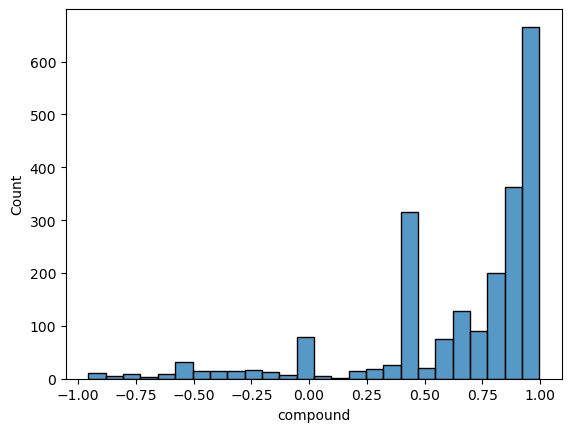

In [23]:
sns.histplot(df['compound'])

<Axes: xlabel='neg', ylabel='Count'>

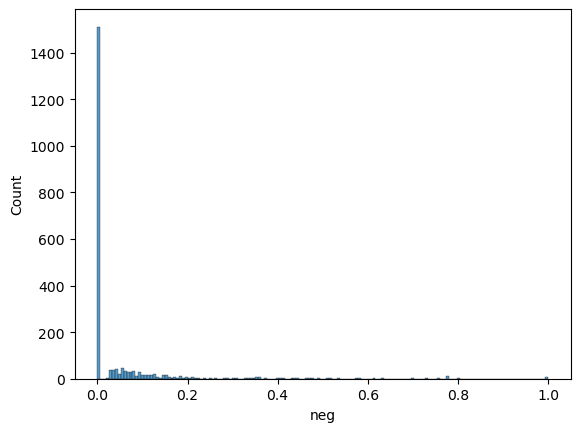

In [24]:
sns.histplot(df['neg'])

<Axes: xlabel='neu', ylabel='Count'>

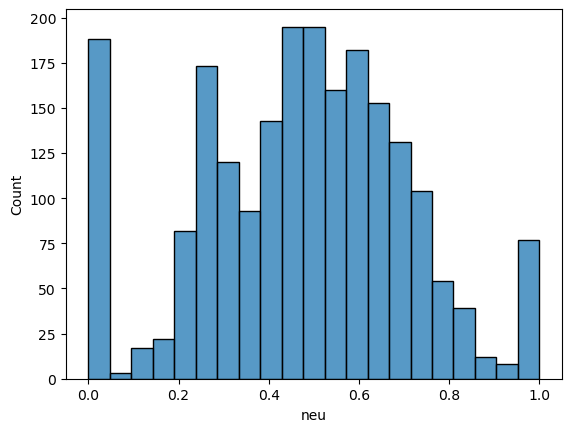

In [25]:
sns.histplot(df['neu'])

<Axes: xlabel='pos', ylabel='Count'>

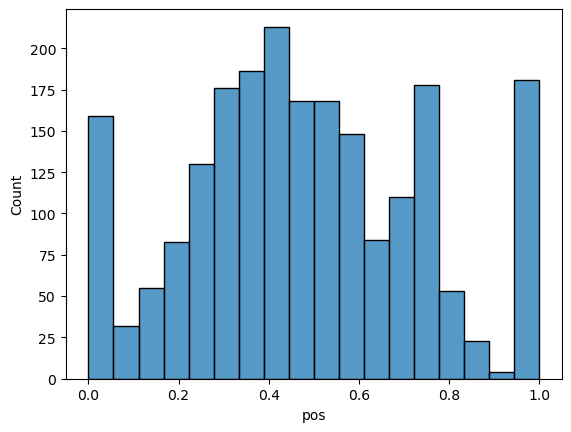

In [26]:
sns.histplot(df['pos'])

In [27]:
# Metadata Extraction

# Display the metadata fields
metadata = df[['Product_name']]
print(metadata)

                              Product_name
0     DELL Inspiron Athlon Dual Core 3050U
1     DELL Inspiron Athlon Dual Core 3050U
2     DELL Inspiron Athlon Dual Core 3050U
3     DELL Inspiron Athlon Dual Core 3050U
4     DELL Inspiron Athlon Dual Core 3050U
...                                    ...
2146            HP Ryzen 3 Dual Core 3250U
2147            HP Ryzen 3 Dual Core 3250U
2148            HP Ryzen 3 Dual Core 3250U
2149            HP Ryzen 3 Dual Core 3250U
2150            HP Ryzen 3 Dual Core 3250U

[2151 rows x 1 columns]


In [28]:
# Tokenize and apply Parts of speech tagging to the review 
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Subashree\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
# To perform part-of-speech (POS) tagging

# Apply POS tagging to the review descriptions
df['pos_tags'] = df['review'].apply(pos_tagging)

# Display the DataFrame with POS tags
print(df[['review', 'pos_tags']])

                                                 review  \
0     Best under 60k Great performanceI got it for a...   
1                                    Good perfomence...   
2     Great performance but usually it has also that...   
3              My wife is so happy and best product 👌🏻😘   
4     Light weight laptop with new amazing features,...   
...                                                 ...   
2146                      Superb Monitor ...Loved it ❤️   
2147  nice  product and beautiful monitor 😍😍 very cl...   
2148  LG monitor is very good it is budget segment m...   
2149  well.....Ist of all package was mind blowing s...   
2150  I like thz product. Low cost and wide screen. ...   

                                               pos_tags  
0     [(Best, NNP), (under, IN), (60k, CD), (Great, ...  
1              [(Good, JJ), (perfomence, NN), (..., :)]  
2     [(Great, JJ), (performance, NN), (but, CC), (u...  
3     [(My, PRP$), (wife, NN), (is, VBZ), (so, RB), ...  
4

In [30]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [31]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 15.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on the review descriptions
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [34]:
# Apply NER to the review descriptions
df['ner_entities'] = df['review'].apply(perform_ner)

# Display the DataFrame with NER entities
print(df[['review', 'ner_entities']])

                                                 review  \
0     Best under 60k Great performanceI got it for a...   
1                                    Good perfomence...   
2     Great performance but usually it has also that...   
3              My wife is so happy and best product 👌🏻😘   
4     Light weight laptop with new amazing features,...   
...                                                 ...   
2146                      Superb Monitor ...Loved it ❤️   
2147  nice  product and beautiful monitor 😍😍 very cl...   
2148  LG monitor is very good it is budget segment m...   
2149  well.....Ist of all package was mind blowing s...   
2150  I like thz product. Low cost and wide screen. ...   

                              ner_entities  
0                      [(Display, PERSON)]  
1                                       []  
2                      [(2 - 3, CARDINAL)]  
3                                       []  
4                                       []  
...                  

In [35]:
# Function to perform NER on the review descriptions
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the review descriptions
df['ner_entities'] = df['review'].apply(perform_ner)

# Display the DataFrame with NER entities
print(df[['review', 'ner_entities']])

                                                 review  \
0     Best under 60k Great performanceI got it for a...   
1                                    Good perfomence...   
2     Great performance but usually it has also that...   
3              My wife is so happy and best product 👌🏻😘   
4     Light weight laptop with new amazing features,...   
...                                                 ...   
2146                      Superb Monitor ...Loved it ❤️   
2147  nice  product and beautiful monitor 😍😍 very cl...   
2148  LG monitor is very good it is budget segment m...   
2149  well.....Ist of all package was mind blowing s...   
2150  I like thz product. Low cost and wide screen. ...   

                              ner_entities  
0                      [(Display, PERSON)]  
1                                       []  
2                      [(2 - 3, CARDINAL)]  
3                                       []  
4                                       []  
...                  

In [36]:
(df['compound']<-0).groupby(df['Product_name']).sum()

Product_name
ASUS Ryzen 3 Dual Core 3250U 3rd Gen                10
ASUS VivoBook 15 (2021) Core i3 10th Gen            38
DELL Inspiron Athlon Dual Core 3050U                 6
HP Core i3 11th Gen                                 65
HP Ryzen 3 Dual Core 3250U                           8
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H     22
Name: compound, dtype: int64

In [37]:
import pandas as pd

# Assuming df['compound'] contains the compound scores and df['product name'] contains the product names
# Calculate the percentage of negative reviews for each product
percent_negative = pd.DataFrame((df['compound'] < 0).groupby(df['Product_name']).sum()
                                  / df['Product_name'].groupby(df['Product_name']).count() * 100,
                                  columns=['% negative reviews']).sort_values(by='% negative reviews')

print(percent_negative)


                                                  % negative reviews
Product_name                                                        
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H             4.751620
HP Ryzen 3 Dual Core 3250U                                  6.349206
DELL Inspiron Athlon Dual Core 3050U                        6.521739
ASUS VivoBook 15 (2021) Core i3 10th Gen                    6.959707
HP Core i3 11th Gen                                         8.014797
ASUS Ryzen 3 Dual Core 3250U 3rd Gen                        8.849558


<Axes: xlabel='% negative reviews', ylabel='Product_name'>

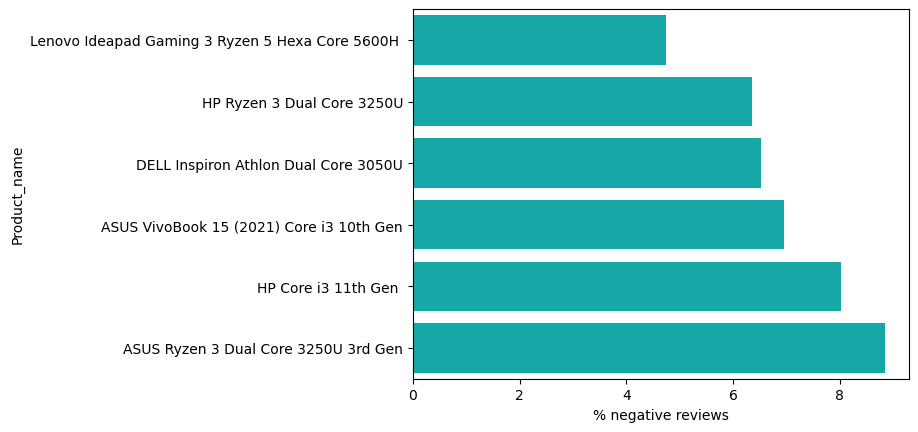

In [38]:
sns.barplot(data=percent_negative, x = '% negative reviews', y=percent_negative.index, color = 'c')

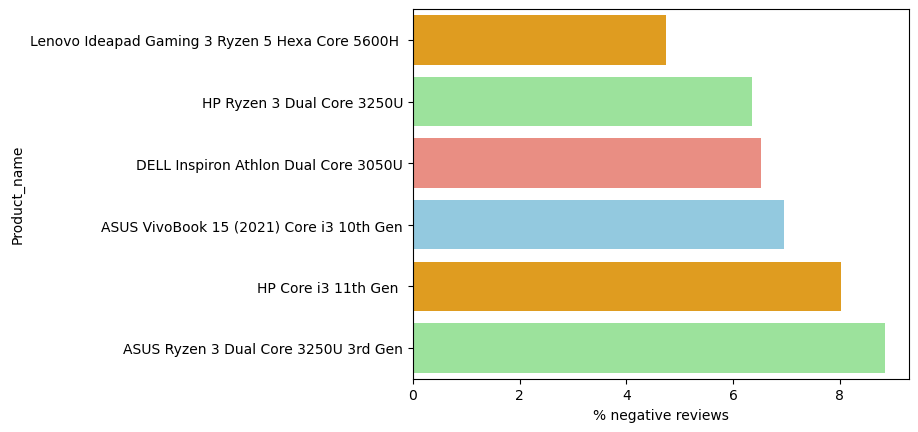

In [40]:
# Assuming percent_negative is a DataFrame or Series with index and '% negative reviews' column

# Define a color palette for the bars
colors = ['orange', 'lightgreen', 'salmon', 'skyblue']  # Add or modify colors as needed

# Plotting the bar plot with different colors for each bar
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, palette=colors)

# Show the plot
plt.show()

# the most frequent in Positve and Negative Review 

In [41]:
# Filtering positive reviews for DELL laptop  1
review_positive_delllaptop= df[(df['Product_name'] == 'DELL Inspiron Athlon Dual Core 3050U') & (df['compound'] > 0)]

# Filtering negative reviews for DELL laptop
review_negative_delllaptop = df[(df['Product_name'] == 'DELL Inspiron Athlon Dual Core 3050U') & (df['compound'] < 0)]

review_positive_delllaptop.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos,pos_tags,ner_entities
0,0,DELL Inspiron Athlon Dual Core 3050U,Best under 60k Great performanceI got it for a...,5,"[Best, under, 60k, Great, performanceI, got, i...","[best, 60k, great, performancei, got, around, ...",best 60k great performancei got around 58500ba...,0.9371,0.096,0.520,0.384,"[(Best, NNP), (under, IN), (60k, CD), (Great, ...","[(Display, PERSON)]"
1,1,DELL Inspiron Athlon Dual Core 3050U,Good perfomence...,5,"[Good, perfomence]","[good, perfomence]",good perfomence,0.4404,0.000,0.256,0.744,"[(Good, JJ), (perfomence, NN), (..., :)]",[]
2,2,DELL Inspiron Athlon Dual Core 3050U,Great performance but usually it has also that...,5,"[Great, performance, but, usually, it, has, al...","[great, performance, usually, also, gaming, la...",great performance usually also gaming laptop's...,0.7096,0.000,0.742,0.258,"[(Great, JJ), (performance, NN), (but, CC), (u...","[(2 - 3, CARDINAL)]"
3,3,DELL Inspiron Athlon Dual Core 3050U,My wife is so happy and best product 👌🏻😘,5,"[My, wife, is, so, happy, and, best, product]","[wife, happy, best, product]",wife happy best product,0.8360,0.000,0.202,0.798,"[(My, PRP$), (wife, NN), (is, VBZ), (so, RB), ...",[]
4,4,DELL Inspiron Athlon Dual Core 3050U,"Light weight laptop with new amazing features,...",5,"[Light, weight, laptop, with, new, amazing, fe...","[light, weight, laptop, new, amazing, features...",light weight laptop new amazing feature batter...,0.8360,0.000,0.470,0.530,"[(Light, JJ), (weight, VBD), (laptop, JJ), (wi...",[]


In [42]:
review_negative_delllaptop.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos,pos_tags,ner_entities
13,13,DELL Inspiron Athlon Dual Core 3050U,If you can affort few thousands extra you can ...,2,"[If, you, can, affort, few, thousands, extra, ...","[affort, thousands, extra, prefer, laptops, co...",affort thousand extra prefer laptop config cam...,-0.2960,0.149,0.752,0.099,"[(If, IN), (you, PRP), (can, MD), (affort, VB)...","[(affort few thousands, CARDINAL), (Asus, PERS..."
31,31,DELL Inspiron Athlon Dual Core 3050U,Every thing is just fine but the tn display is...,5,"[Every, thing, is, just, fine, but, the, tn, d...","[every, thing, fine, tn, display, annoying, al...",every thing fine tn display annoying always,-0.2263,0.284,0.526,0.189,"[(Every, DT), (thing, NN), (is, VBZ), (just, R...",[]
38,38,DELL Inspiron Athlon Dual Core 3050U,nice product everything is okay but battery po...,3,"[nice, product, everything, is, okay, but, bat...","[nice, product, everything, okay, battery, pow...",nice product everything okay battery power wor...,-0.1779,0.332,0.323,0.346,"[(nice, JJ), (product, NN), (everything, NN), ...",[]
39,39,DELL Inspiron Athlon Dual Core 3050U,Display so bad quality and wifi connectivity i...,1,"[Display, so, bad, quality, and, wifi, connect...","[display, bad, quality, wifi, connectivity, ia...",display bad quality wifi connectivity ia also ...,-0.8658,0.519,0.481,0.000,"[(Display, NNP), (so, RB), (bad, JJ), (quality...",[]
65,65,DELL Inspiron Athlon Dual Core 3050U,Very bad experience,1,"[Very, bad, experience]","[bad, experience]",bad experience,-0.5423,0.778,0.222,0.000,"[(Very, RB), (bad, JJ), (experience, NN)]",[]


In [44]:
# Filtering positive reviews for ASUS vivobook 1
review_positive_asusvivo= df[(df['Product_name'] == 'ASUS VivoBook 15 (2021) Core i3 10th Gen') & (df['compound'] > 0)]

# Filtering negative reviews for DELL laptop
review_negative_asusvivo = df[(df['Product_name'] == 'ASUS VivoBook 15 (2021) Core i3 10th Gen') & (df['compound'] < 0)]

review_positive_asusvivo.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos,pos_tags,ner_entities
92,92,ASUS VivoBook 15 (2021) Core i3 10th Gen,"So basically, laptop is well and good. But the...",3,"[So, basically, laptop, is, well, and, good, B...","[basically, laptop, well, good, huge, huge, hu...",basically laptop well good huge huge huge prob...,0.6121,0.220,0.460,0.320,"[(So, RB), (basically, RB), (,, ,), (laptop, N...","[(Battery, LOC), (second, ORDINAL), (Pros - 1,..."
93,93,ASUS VivoBook 15 (2021) Core i3 10th Gen,"Best deal in this budget 👌, boot in just fract...",5,"[Best, deal, in, this, budget, boot, in, just,...","[best, deal, budget, boot, fraction, seconds, ...",best deal budget boot fraction second really f...,0.9681,0.000,0.560,0.440,"[(Best, JJS), (deal, NN), (in, IN), (this, DT)...","[(N-Vidia Graphics, ORG), (512ssd, CARDINAL)]"
94,94,ASUS VivoBook 15 (2021) Core i3 10th Gen,Value for Money! Amazing Laptop I got! It ha...,5,"[Value, for, Money, Amazing, Laptop, I, got, I...","[value, money, amazing, laptop, got, mind, blo...",value money amazing laptop got mind blowing pe...,0.9360,0.000,0.601,0.399,"[(Value, NNP), (for, IN), (Money, NNP), (!, .)...","[(only 8 - 9, CARDINAL), (sec, ORG), (Build Qu..."
95,95,ASUS VivoBook 15 (2021) Core i3 10th Gen,Total good laptop,5,"[Total, good, laptop]","[total, good, laptop]",total good laptop,0.4404,0.000,0.408,0.592,"[(Total, JJ), (good, JJ), (laptop, NN)]",[]
96,96,ASUS VivoBook 15 (2021) Core i3 10th Gen,Amazing laptop. It has a premium and professio...,5,"[Amazing, laptop, It, has, a, premium, and, pr...","[amazing, laptop, premium, professional, look,...",amazing laptop premium professional look power...,0.8750,0.128,0.479,0.394,"[(Amazing, JJ), (laptop, NN), (., .), (It, PRP...",[]


In [45]:
review_negative_asusvivo.head()

,Unnamed: 0,Product_name,review,Rating,tokenized_review,cleaned_review,lemmatized_review,compound,neg,neu,pos,pos_tags,ner_entities
130,130,ASUS VivoBook 15 (2021) Core i3 10th Gen,Worth it! Back-lit keyboard Problem 😐,4,"[Worth, it, Back, lit, keyboard, Problem]","[worth, back, lit, keyboard, problem]",worth back lit keyboard problem,-0.2023,0.355,0.395,0.250,"[(Worth, IN), (it, PRP), (!, .), (Back-lit, NN...",[]
170,170,ASUS VivoBook 15 (2021) Core i3 10th Gen,Poor camera quality Infact same time not worki...,1,"[Poor, camera, quality, Infact, same, time, no...","[poor, camera, quality, infact, time, working,...",poor camera quality infact time working poor d...,-0.5106,0.363,0.468,0.170,"[(Poor, NNP), (camera, NN), (quality, NN), (In...",[]
171,171,ASUS VivoBook 15 (2021) Core i3 10th Gen,Phone Is Value For Maney ..But Camera Is Bad C...,1,"[Phone, Is, Value, For, Maney, But, Camera, Is...","[phone, value, maney, camera, bad, condition]",phone value maney camera bad condition,-0.2732,0.354,0.404,0.242,"[(Phone, NN), (Is, VBZ), (Value, NNP), (For, I...","[(Maney, PERSON)]"
176,176,ASUS VivoBook 15 (2021) Core i3 10th Gen,Don't buy this phone it has bad camera quality,1,"[Don't, buy, this, phone, it, has, bad, camera...","[buy, phone, bad, camera, quality]",buy phone bad camera quality,-0.5423,0.467,0.533,0.000,"[(Do, VBP), (n't, RB), (buy, VB), (this, DT), ...",[]
177,177,ASUS VivoBook 15 (2021) Core i3 10th Gen,Worst ever!!,1,"[Worst, ever]","[worst, ever]",worst ever,-0.6249,0.804,0.196,0.000,"[(Worst, RBS), (ever, RB), (!, .), (!, .)]",[]


# Word Cloud Graph

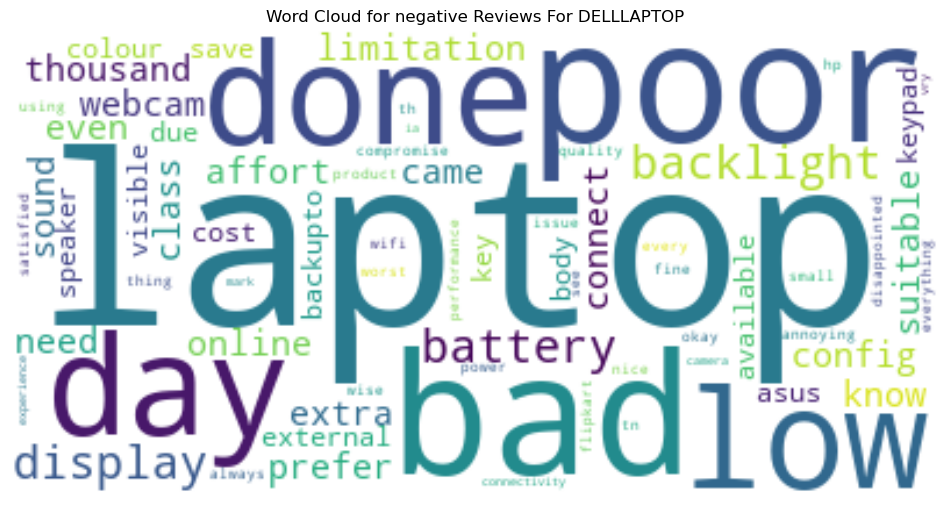

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'processed_reviewDescribe' column for processed text in negative reviews
# Assuming 'reviews_negative_subset' contains the negative reviews DataFrame

# Extracting tokens from the processed_reviewDescribe column in negative reviews
neg_tokens_1 = [word for review in review_negative_delllaptop['lemmatized_review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens_1))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for negative Reviews For DELLLAPTOP')
plt.axis("off")
plt.show()


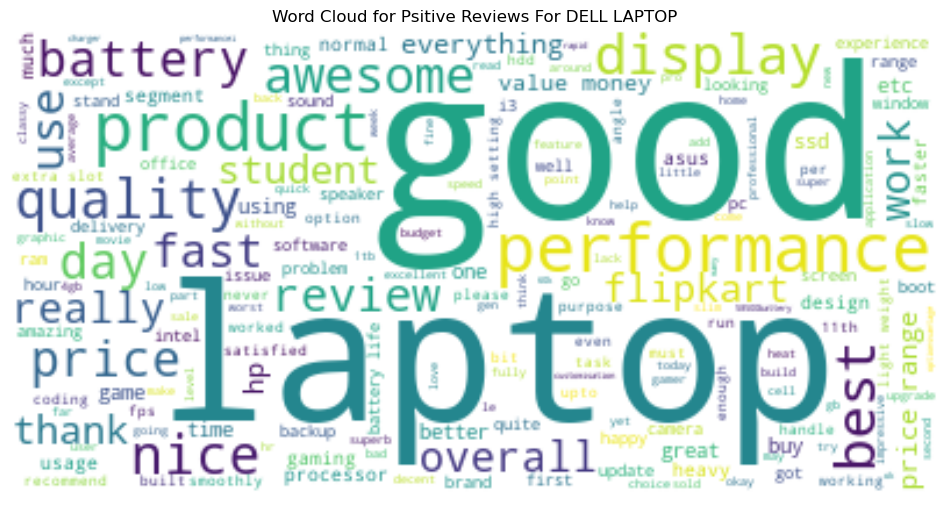

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'processed_reviewDescribe' column for processed text in negative reviews
# Assuming 'reviews_negative_subset' contains the negative reviews DataFrame

# Extracting tokens from the processed_reviewDescribe column in negative reviews
neg_tokens_1 = [word for review in review_positive_delllaptop['lemmatized_review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens_1))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Psitive Reviews For DELL LAPTOP')
plt.axis("off")
plt.show()


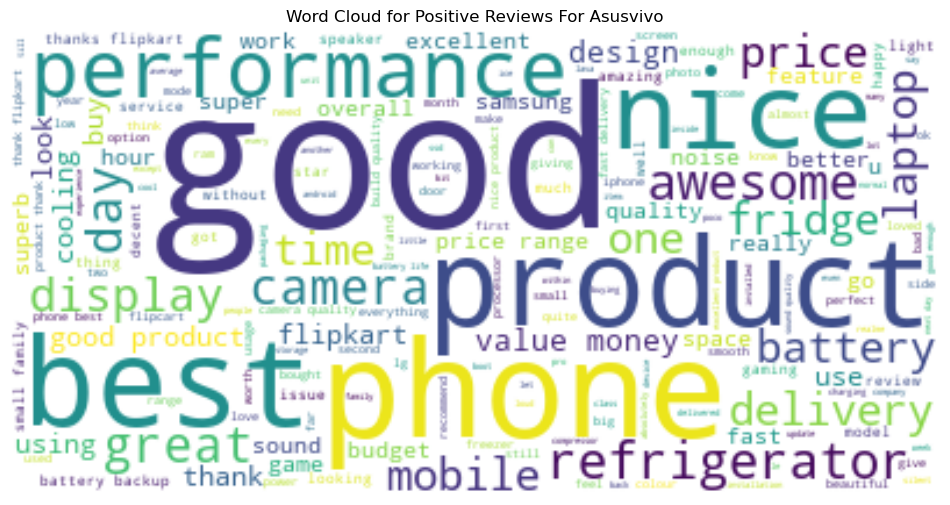

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'processed_reviewDescribe' column for processed text in negative reviews
# Assuming 'reviews_negative_subset' contains the negative reviews DataFrame

# Extracting tokens from the processed_reviewDescribe column in negative reviews
neg_tokens_1 = [word for review in review_positive_asusvivo['lemmatized_review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens_1))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews For Asusvivo')
plt.axis("off")
plt.show()

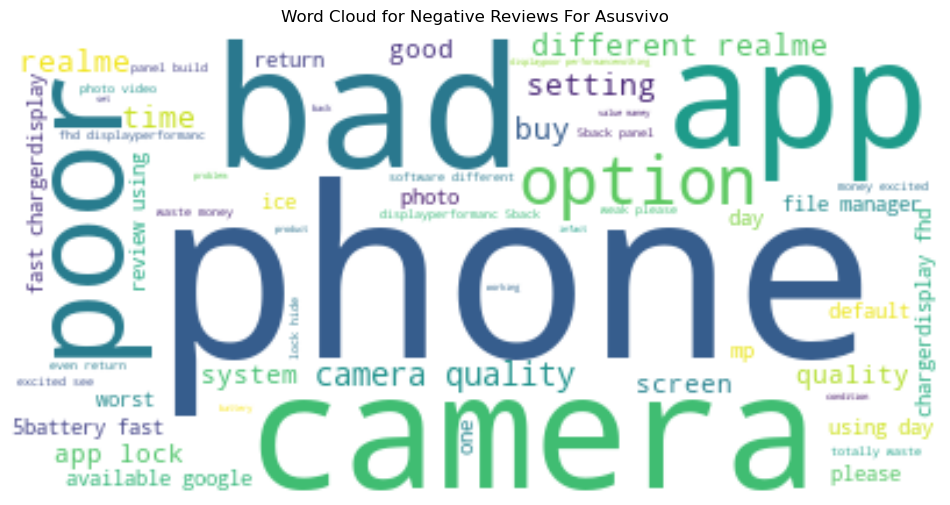

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'processed_reviewDescribe' column for processed text in negative reviews
# Assuming 'reviews_negative_subset' contains the negative reviews DataFrame

# Extracting tokens from the processed_reviewDescribe column in negative reviews
neg_tokens_1 = [word for review in review_negative_asusvivo['lemmatized_review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens_1))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews For Asusvivo')
plt.axis("off")
plt.show()